MemoryError: Unable to allocate 5.31 GiB for an array with shape (77215, 9235) and data type float64

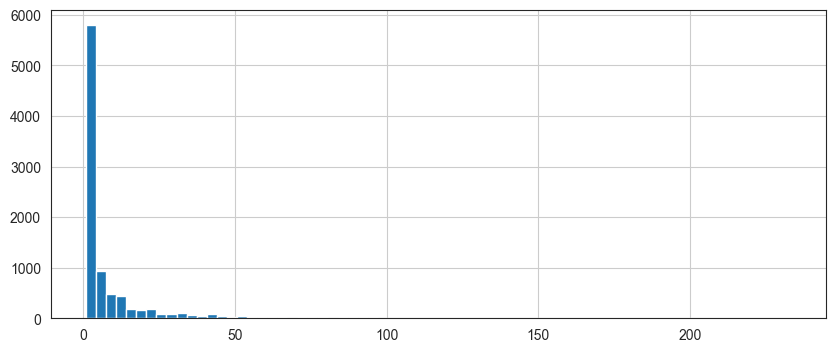

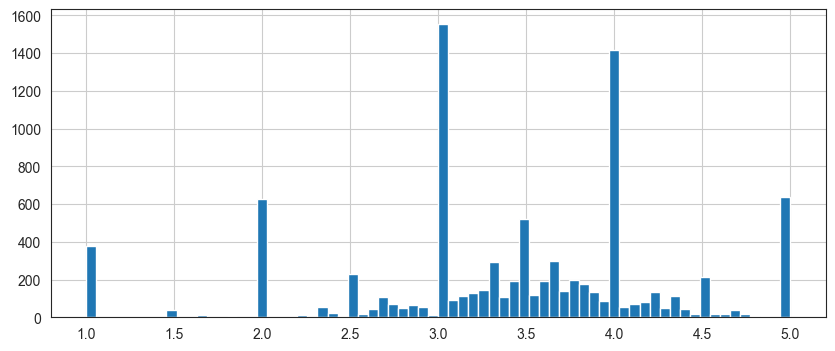

In [70]:
# import polars as pl
import re
from tqdm import tqdm
import matplotlib.pyplot as plt 
from apyori import apriori
import pandas as pd
import sqlite3 as db
import numpy as np 
import math 
import re 
from scipy.sparse import csr_matrix 
import seaborn as sns
sns.set_style('white')

#from surprise import Reader, Dataset, SVD, evaluate 
#from sklearn.feature_extraction import text 
#from sklearn.metrics.pairwise import cosine_similarity

'''con = db.connect('netflix_dev.db')
data = pd.read_sql_query("SELECT * FROM netflix_data", con)
data.head()

#Erstelle ein Dataframe mit einem average rating und einer Anzahl an Bewertungen 
data.groupby('film')['rating'].mean().sort_values(ascending= False).head()
data.groupby('film')['rating'].count().sort_values(ascending=False).head()

ratings = pd.DataFrame(data.groupby('film')['rating'].mean())
ratings.head()
ratings['Anzahl_Ratings'] = pd.DataFrame(data.groupby('film')['rating'].count())
ratings.head()

# Zwei visuelle Darstellungen der Verteilung von Anzahl der Ratings und Wahl der Ratings
plt.figure(figsize=(10,4))
ratings['Anzahl_Ratings'].hist(bins=70)

plt.figure(figsize =(10,4))
ratings['rating'].hist(bins=70)

#Erstellen einer Matrix mit Usern als Zeilen und Filmen als Spalten. Jede Zelle beschreibt das Rating des Users für den jeweiligen Film.
moviemat = data.pivot_table(index='user', columns='film', values ='rating')

# Gebe Filme, die am häufigsten bewertet wurden
ratings.sort_values('Anzahl_Ratings',ascending=False).head(10)
#ratings.head()


#Auswahl von zwei Filmen, die auf Korrelation überprüft werden
forrestgump_user_ratings = moviemat['11283']
pirates_caribbean_user_ratings = moviemat['1905']
forrestgump_user_ratings.head()

#Nutzen die Methode corrwith() um Korrelationen zwischen zwei pandas Series zu finden. 
similar_to_forrestgump = moviemat.corrwith(forrestgump_user_ratings)
similar_to_pirates_caribbean = moviemat.corrwith(pirates_caribbean_user_ratings)

#Korrelation Dataframe erstellen 
corr_forrestgump = pd.DataFrame(similar_to_forrestgump, columns=['correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump.head()

# Dataframe nach Korrelation sortieren und somit die ähnlichsten Filme anzeigen 
corr_forrestgump.sort_values('correlation', ascending= False).head()

#Filme mit weniger als 100 Bewertungen rausfiltern
corr_forrestgump = corr_forrestgump.join(ratings['Anzahl_Ratings'])
corr_forrestgump.head()
corr_forrestgump[corr_forrestgump['Anzahl_Ratings']>100].sort_values('correlation', ascending = False).head()'''



Movie minimum times of review: 12.0
Customer minimum times of review: 2.0


In [80]:
data.shape
n_users = len(data.user.unique())
n_films = len(data.film.unique())
print("Number of unique users:", n_users)
print("Number of unique films:", n_films)
print("The Matrix will have:", n_films*n_films, "cells.")
print("Number of ratings:", len(data))
print("Therefore: ", len(data) / (n_users*n_films)*100, "% of the Matrix is filled.")


Number of unique users: 77215
Number of unique films: 9235
The Matrix will have: 85285225 cells.
Number of ratings: 100000
Therefore:  0.014023661633445955 % of the Matrix is filled.


ModuleNotFoundError: No module named 'torch'

In [89]:
#Content Based Recommendation System 
#TF*IDF algorithm --> shows the significant words; overview: Term Frequency (Frequency of a Word, how many times it is mentioned in the overview) * Inverse document frequency (The weight of rare words within the overview)
#Vektor Space Model 
#Calculating Cosine Similarity (Calculate Relation of words)


import numpy as np #Lineare Algebra 
import pandas as pd #Datenverarbeitung 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans

#df_movietitles  = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\d\ata\\movie_titles.csv")
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')
columns = ['index', 'Title', 'Year', 'Response', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Overview', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website']
df.columns = columns
unique_genres = df['Genre'].unique()
pd.set_option('display.max_rows', None)
# Ausgabe der eindeutigen Genres
# print(unique_genres)
# DataFrame anzeigen
df.head()
df['Overview']
tfidf = TfidfVectorizer(stop_words='english') 
df['Overview'] = df['Overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(df['Overview']) #Build vector space # fit means providing data to your algorithm # transform means that the particular algorithm will perform transformation #coverting words into numbers
print("Number of unique words:", len(tfidf.vocabulary_))
#print(tfidf_matrix)


# Clustering nach Genres
kmeans = KMeans(n_clusters=10)  # Anzahl der Cluster anpassen
genre_clusters = kmeans.fit_predict(tfidf_matrix)

#Cosine Similarity Matrix berechnen 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 
indices = pd.Series(df.index, index =df['Title']).drop_duplicates()


def get_recommendations(Title, genre, cosine_sim= cosine_sim, genre_clusters=genre_clusters):
    idx = indices[Title]
    # Cluster des Genres abrufen
    target_cluster = genre_clusters[idx]
    # Alle Filme im gleichen Cluster mit dem gleichen Genre auswählen
    cluster_indices = np.where(genre_clusters == target_cluster)[0]
    genre_indices = [i for i in cluster_indices if df['Genre'].iloc[i] == genre] # Gibt Empfehlungen mit gleichem Genre aus
    # Cosine Similarity Scores für ausgewählte Filme berechnen                               ]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [x for x in sim_scores if x[0] in genre_indices]
    sim_scores = sim_scores[1:11]
    sim_index = [i[0] for i in sim_scores]
    print(df['Title'].iloc[sim_index])

get_recommendations('The Santa Clause 2', 'Comedy, Family, Fantasy')



Number of unique words: 16955


c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2403    Ernest Saves Christmas
4419                Fat Albert
2181          Wish Upon a Star
4350     Angels in the Endzone
137         Herbie Rides Again
683             Dr. Dolittle 2
801                     Casper
1349             Freaky Friday
1408             Freaky Friday
1453               Hocus Pocus
Name: Title, dtype: object


In [39]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
# Einlesen der Daten
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')
columns = ['index', 'Title', 'Year', 'Response', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Overview', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website']
df.columns = columns

# Textvorverarbeitung und TF-IDF-Matrix erstellen
tfidf = TfidfVectorizer(stop_words='english') 
df['Overview'] = df['Overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(df['Overview'])

# Clustering nach Genres
kmeans = KMeans(n_clusters=10)  # Anzahl der Cluster anpassen
genre_clusters = kmeans.fit_predict(tfidf_matrix)

# Cosine Similarity Matrix berechnen
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

# Ersetzen Sie NaN durch einen leeren String
df['Genre'] = df['Genre'].fillna('')

# Create a count vectorizer object
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))


# Fit and transform the genres to a 2-D matrix
genre_matrix = vectorizer.fit_transform(df['Genre'])

# Calculate the cosine similarity
genre_cosine_sim = cosine_similarity(genre_matrix, genre_matrix)


def get_recommendations(title, cosine_sim=cosine_sim, bonus_actor=0.1, bonus_same_director=0.2, bonus_same_genre=0.2, min_same_genre_count=4):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    genre = df['Genre'].iloc[idx]
    director1 = df['Director'].iloc[idx]
    genre_counts = df['Genre'].value_counts()
    
    bonus_info = [None] * len(sim_scores)  # Hält Informationen zu den Gründen für die Boni

    for i, _ in sim_scores:
        actors1 = df['Actors'].iloc[idx]
        actors2 = df['Actors'].iloc[i]
        common_actors = set()
        if isinstance(actors1, str) and isinstance(actors2, str):
            actors1 = set(actors1.split(','))
            actors2 = set(actors2.split(','))
            common_actors = actors1.intersection(actors2)
        
        director2 = df['Director'].iloc[i]
        genre2 = df['Genre'].iloc[i]

        if genre_cosine_sim[idx][i] > 0.4:
            if len(common_actors) > 0:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_actor)
                bonus_info[i] = f"Gleiche Schauspieler: {', '.join(common_actors)}"
            if director1 == director2:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_same_director)
                bonus_info[i] = f"Gleicher Regisseur: {director1}"
            if genre == genre2 and genre_counts[genre2] >= min_same_genre_count:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_same_genre)
                bonus_info[i] = f"Gleiches Genre: {genre2}"
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    recommended_indices = [i[0] for i in sim_scores[1:11]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    info = []
    
    for index, i in enumerate(recommended_indices):
        info.append(f"Adjusted Score: {sim_scores[index + 1][1]}. {bonus_info[i]}")
            
    recommendations_info = list(zip(recommended_titles, info))
    return recommendations_info


# Beispielaufruf
recommendations = get_recommendations('Winnie the Pooh: Springtime with Roo')
for title, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Schauspieler: {actor}")
    print("------")





c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Filmtitel: Pooh's Heffalump Movie
Schauspieler: Adjusted Score: 0.2258239439379784. Gleiche Schauspieler: Jim Cummings
------
Filmtitel: Baby Looney Tunes' Eggs-traordinary Adventure
Schauspieler: Adjusted Score: 0.1426964341381261. None
------
Filmtitel: Short Cuts
Schauspieler: Adjusted Score: 0.1286623427670792. None
------
Filmtitel: Bell, Book and Candle
Schauspieler: Adjusted Score: 0.12724669327572768. None
------
Filmtitel: Gorgeous
Schauspieler: Adjusted Score: 0.1266366272289743. None
------
Filmtitel: The Tenant
Schauspieler: Adjusted Score: 0.11945044083036359. None
------
Filmtitel: Session 9
Schauspieler: Adjusted Score: 0.11034040451609997. None
------
Filmtitel: The Mouse That Roared
Schauspieler: Adjusted Score: 0.1103228585449839. None
------
Filmtitel: Touch of Pink
Schauspieler: Adjusted Score: 0.10484055874749215. None
------
Filmtitel: Piglet's Big Movie
Schauspieler: Adjusted Score: 0.1. Gleiche Schauspieler:  Ken Sansom
------


In [15]:
import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')



# Alle Einträge als Liste ausgeben
einträge_liste = df['Genre'].tolist()

# Ausgabe der Einträge
print(einträge_liste)


['Documentary, Animation, Family', nan, 'Crime, Drama, Mystery', 'Horror, Thriller', 'Documentary', 'Action, Drama, Romance', 'Comedy, Crime, Mystery', nan, 'Documentary, Music', 'Horror, Sci-Fi, Thriller', 'Action, Comedy, Crime, Thriller', 'Biography, Drama, Music', 'Adventure, Comedy, Drama', 'Comedy, Romance', nan, 'Horror, Mystery, Thriller', nan, 'Action, Crime, Drama', nan, nan, 'Comedy, Drama, Romance', nan, nan, 'Animation, Adventure, Family, Fantasy', 'Drama, Romance', 'Romance', 'Action, Drama, Family', 'Drama', 'Drama', 'Comedy, Drama, Romance', 'Animation, Adventure, Comedy', 'Drama, Romance', 'Action, Adventure, Fantasy', 'Documentary, History, War', 'Comedy, Romance', 'Crime, Drama, Thriller', 'Drama, Crime', 'Drama, Sci-Fi, War', 'Action, Adventure, Fantasy', 'Biography, Drama, History', 'Documentary, Music', 'Animation, Action, Adventure', 'Documentary, Biography', nan, nan, 'Action, Adventure, Mystery', 'Adventure, Comedy, Family', 'Crime, Drama, Mystery', 'Biography,

c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


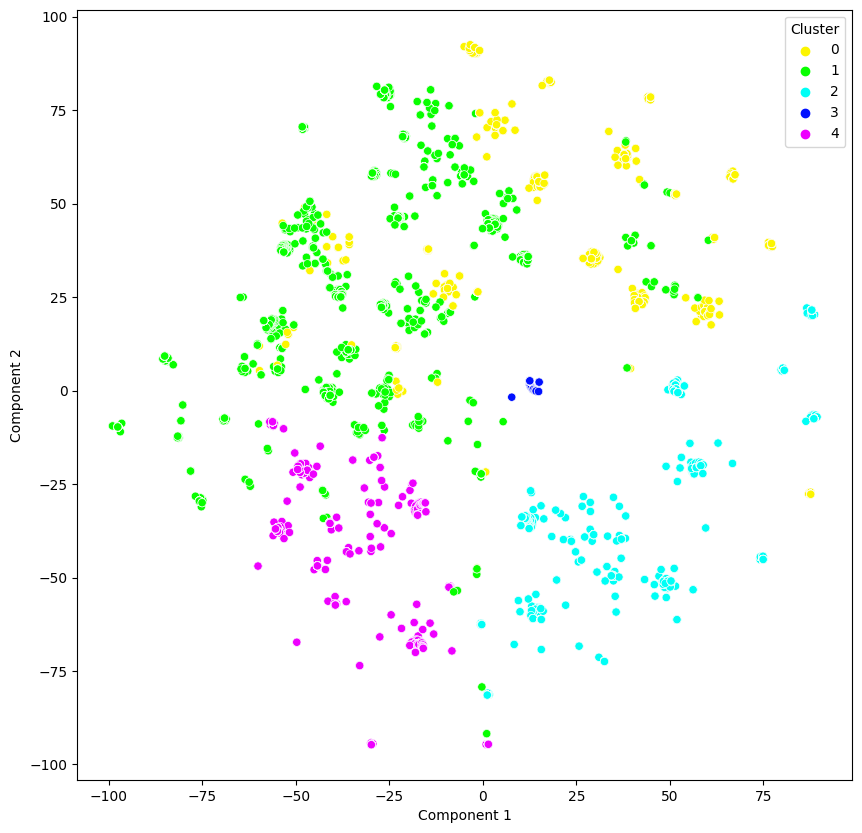

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Create a count vectorizer object
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

df['Genre'] = df['Genre'].fillna('')

# Fit and transform the genres to a 2-D matrix
genre_matrix = vectorizer.fit_transform(df['Genre'])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(genre_matrix)

# Add the cluster labels to the dataframe
df['Genre Cluster'] = kmeans.labels_

from sklearn.manifold import TSNE

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
genre_tsne = tsne.fit_transform(genre_matrix.toarray())

import matplotlib.pyplot as plt
import seaborn as sns

# Convert t-SNE results to a dataframe
tsne_df = pd.DataFrame(data = genre_tsne, columns = ['Component 1', 'Component 2'])

# Add the cluster labels
tsne_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10,10))
sns.scatterplot(x="Component 1", y="Component 2", hue="Cluster", palette=sns.color_palette("hsv", 5), data=tsne_df)
plt.show()



In [57]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Einlesen der Daten
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')
columns = ['index', 'Title', 'Year', 'Response', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Overview', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website']
df.columns = columns

# Textvorverarbeitung und TF-IDF-Matrix erstellen
tfidf = TfidfVectorizer(stop_words='english')
df['Overview'] = df['Overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(df['Overview'])

# Clustering nach Genres
kmeans = KMeans(n_clusters=10)  # Anzahl der Cluster anpassen
genre_clusters = kmeans.fit_predict(tfidf_matrix)

# Cosine Similarity Matrix berechnen
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

# Ersetzen Sie NaN durch einen leeren String
df['Genre'] = df['Genre'].fillna('')

# Create a count vectorizer object
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

# Fit and transform the genres to a 2-D matrix
genre_matrix = vectorizer.fit_transform(df['Genre'])

# Calculate the cosine similarity
genre_cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

def get_recommendations(title, cosine_sim=cosine_sim, genre_clusters=genre_clusters, bonus_actor=0.1, 
                        bonus_same_director=0.2, bonus_same_genre=0.2, min_same_genre_count=4):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    genre_cluster = genre_clusters[idx]  # Cluster des Ausgangsfilms

    genre = df['Genre'].iloc[idx]
    director1 = df['Director'].iloc[idx]
    genre_counts = df['Genre'].value_counts()

    bonus_info = [None] * len(sim_scores)  # Hält Informationen zu den Gründen für die Boni

    for i, _ in sim_scores:
        if genre_clusters[i] != genre_cluster:  # Nur Filme aus demselben Genre-Cluster berücksichtigen
            sim_scores[i] = (i, -1)  # Setze den Score auf -1, um ihn unten zu sortieren
            continue

        actors1 = df['Actors'].iloc[idx]
        actors2 = df['Actors'].iloc[i]
        common_actors = set()
        if isinstance(actors1, str) and isinstance(actors2, str):
            actors1 = set(actors1.split(','))
            actors2 = set(actors2.split(','))
            common_actors = actors1.intersection(actors2)

        director2 = df['Director'].iloc[i]
        genre2 = df['Genre'].iloc[i]

        if genre_cosine_sim[idx][i] > 0.4:
            if len(common_actors) > 0:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_actor)
                bonus_info[i] = f"Gleiche Schauspieler: {', '.join(common_actors)}"
            if director1 == director2:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_same_director)
                bonus_info[i] = f"Gleicher Regisseur: {director1}"
            if genre == genre2 and genre_counts[genre2] >= min_same_genre_count:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_same_genre)
                bonus_info[i] = f"Gleiches Genre: {genre2}"

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [score for score in sim_scores if score[1] > 0]  # Entferne Filme mit negativem Score

    recommended_indices = [i[0] for i in sim_scores[1:11]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    info = []

    for index, i in enumerate(recommended_indices):
        info.append(f"Adjusted Score: {sim_scores[index + 1][1]}. {bonus_info[i]}")

    recommendations_info = list(zip(recommended_titles, info))
    return recommendations_info



recommendations = get_recommendations('Winnie the Pooh: Springtime with Roo')
for title, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Schauspieler: {actor}")
    print("------")



c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Filmtitel: Pooh's Heffalump Movie
Schauspieler: Adjusted Score: 0.2258239439379784. Gleiche Schauspieler: Jim Cummings
------
Filmtitel: Baby Looney Tunes' Eggs-traordinary Adventure
Schauspieler: Adjusted Score: 0.1426964341381261. None
------
Filmtitel: Short Cuts
Schauspieler: Adjusted Score: 0.1286623427670792. None
------
Filmtitel: Bell, Book and Candle
Schauspieler: Adjusted Score: 0.12724669327572768. None
------
Filmtitel: Gorgeous
Schauspieler: Adjusted Score: 0.1266366272289743. None
------
Filmtitel: The Tenant
Schauspieler: Adjusted Score: 0.11945044083036359. None
------
Filmtitel: Session 9
Schauspieler: Adjusted Score: 0.11034040451609997. None
------
Filmtitel: The Mouse That Roared
Schauspieler: Adjusted Score: 0.1103228585449839. None
------
Filmtitel: Touch of Pink
Schauspieler: Adjusted Score: 0.10484055874749215. None
------
Filmtitel: Piglet's Big Movie
Schauspieler: Adjusted Score: 0.1. Gleiche Schauspieler:  Ken Sansom
------


In [72]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Einlesen der Daten
df = pd.read_csv(r"C:\\Users\\julia\\OneDrive\\Desktop\\netflix_recommendation\\Source\\data\\movie_data.csv", sep='|')
columns = ['index', 'Title', 'Year', 'Response', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Overview', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website']
df.columns = columns

# Textvorverarbeitung und TF-IDF-Matrix erstellen
tfidf = TfidfVectorizer(stop_words='english')
df['Overview'] = df['Overview'].fillna("")
tfidf_matrix = tfidf.fit_transform(df['Overview'])


# Cosine Similarity Matrix berechnen
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

# Ersetzen Sie NaN durch einen leeren String
df['Genre'] = df['Genre'].fillna('')

# Create a count vectorizer object
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

# Fit and transform the genres to a 2-D matrix
genre_matrix_2D = vectorizer.fit_transform(df['Genre'])

# Calculate the cosine similarity
genre_cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

genre_matrix = vectorizer.fit_transform(df['Genre'].apply(lambda x: ','.join(x)))

kmeans = KMeans(n_clusters=3)  # Anzahl der Cluster anpassen
genre_clusters = kmeans.fit_predict(genre_matrix)

def get_movie_recommendations(title, df=df, bonus_actor=0.1, bonus_same_director=0.2, bonus_same_genre=0.0, min_same_genre_count=4):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    genre_cluster = genre_clusters[idx]  # Cluster des Ausgangsfilms

    genre = df['Genre'].iloc[idx]
    director1 = df['Director'].iloc[idx]
    genre_counts = df['Genre'].value_counts()

    bonus_info = [None] * len(sim_scores)  # Hält Informationen zu den Gründen für die Boni

    for i, _ in sim_scores:
        if genre_clusters[i] != genre_cluster:  # Nur Filme aus demselben Genre-Cluster berücksichtigen
            sim_scores[i] = (i, -1)  # Setze den Score auf -1, um ihn unten zu sortieren
            continue

        actors1 = df['Actors'].iloc[idx]
        actors2 = df['Actors'].iloc[i]
        common_actors = set()
        if isinstance(actors1, str) and isinstance(actors2, str):
            actors1 = set(actors1.split(','))
            actors2 = set(actors2.split(','))
            common_actors = actors1.intersection(actors2)

        director2 = df['Director'].iloc[i]
        genre2 = df['Genre'].iloc[i]

        if genre_cosine_sim[idx][i] > 0.0:
            if len(common_actors) > 0:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_actor)
                bonus_info[i] = f"Gleiche Schauspieler: {', '.join(common_actors)}"
            if director1 == director2:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_same_director)
                bonus_info[i] = f"Gleicher Regisseur: {director1}"
            if genre == genre2 and genre_counts[genre2] >= min_same_genre_count:
                sim_scores[i] = (i, sim_scores[i][1] + bonus_same_genre)
                bonus_info[i] = f"Gleiches Genre: {genre2}"

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [score for score in sim_scores if score[1] > 0]  # Entferne Filme mit negativem Score

    recommended_indices = [i[0] for i in sim_scores[1:21]]  # Anzahl der Empfehlungen anpassen
    recommended_titles = df['Title'].iloc[recommended_indices].tolist()
    cluster_info = ['Im selben Cluster' if genre_clusters[i] == genre_cluster else 'Nicht im selben Cluster' for i in recommended_indices]
    info = []

    for index, i in enumerate(recommended_indices):
        info.append(f"Adjusted Score: {sim_scores[index + 1][1]}. {bonus_info[i]}. {cluster_info[index]}")

    recommendations_info = list(zip(recommended_titles, info))
    recommended_titles = [str(film) for film in recommended_titles]
    return recommended_titles


'''recommendations = get_recommendations('Star Wars: Episode VI: Return of the Jedi')
for title, actor in recommendations:
    print(f"Filmtitel: {title}")
    print(f"Schauspieler: {actor}")
    print("------")
    '''

import sqlite3
import pandas as pd


# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('netflix_dev.db')

# Beispielaufruf der Evaluierungsfunktion
ausgangsfilm_id = 5582

def find_user_with_high_rating(ausgangsfilm_id):
    query = f"SELECT user FROM netflix_data WHERE film = {ausgangsfilm_id} AND rating = 5.0 ORDER BY RANDOM() LIMIT 1"
    result = conn.execute(query).fetchone()
    if result:
        return result[0]
    return None



user_id = find_user_with_high_rating(ausgangsfilm_id)


# Bewertungen des Nutzers für die empfohlenen Filme abrufen

def get_user_ratings(user_id, recommended_films):
    apostrophe_double = str.maketrans({"'": "''"})
    film_values = ', '.join(f"'{film.translate(apostrophe_double)}'" for film in recommended_films)
    query = f"SELECT film, rating FROM netflix_data WHERE user = {user_id} AND film IN ({film_values})"
    user_ratings = pd.read_sql(query, conn)
    return user_ratings


def calculate_map(user_ratings):
    relevant_count = 0
    precision_sum = 0.0
    for i, (_, rating) in enumerate(user_ratings.iterrows(), 1):
        if rating >= 3.0:  # Annahme: Bewertungen von 3.0 oder höher sind relevant
            relevant_count += 1
            precision_sum += relevant_count / i  # Precision berechnen und zur Summe hinzufügen
    if relevant_count == 0:
        return 0.0
    return precision_sum / relevant_count  # Mittelwert der Precision-Werte berechnen

def evaluate_recommendations(user_id, ausgangsfilm_id):
    # Empfehlungen basierend auf dem Ausgangsfilm erhalten
    recommended_films = get_movie_recommendations(ausgangsfilm_id)

    # Bewertungen des Nutzers für die empfohlenen Filme abrufen
    user_ratings = get_user_ratings(user_id, recommended_films)

    # Berechnen der MAP
    map_score = calculate_map(user_ratings)

    print(f"MAP: {map_score}")



# Beispielaufruf der Evaluierungsfunktion
user_id = find_user_with_high_rating(ausgangsfilm_id)
evaluate_recommendations(user_id, ausgangsfilm_id)

# Verbindung zur Datenbank schließen
conn.close()


c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MAP: 0.0


In [52]:
import sqlite3
import pandas as pd


# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('netflix_dev.db')

# Beispielaufruf der Evaluierungsfunktion
ausgangsfilm_id = 5582

def find_user_with_high_rating(ausgangsfilm_id):
    query = f"SELECT user FROM netflix_data WHERE film = {ausgangsfilm_id} AND rating = 5.0 ORDER BY RANDOM() LIMIT 1"
    result = conn.execute(query).fetchone()
    if result:
        return result[0]
    return None

# Beispielaufruf der Evaluierungsfunktion
ausgangsfilm_id = 5582

user_id = find_user_with_high_rating(ausgangsfilm_id)


# Bewertungen des Nutzers für die empfohlenen Filme abrufen
def get_user_ratings(user_id, recommended_films):
    query = f"SELECT film, rating FROM netflix_data WHERE user = {user_id} AND film IN ({','.join(map(str, recommended_films))})"
    user_ratings = pd.read_sql(query, conn)
    return user_ratings

def calculate_map(user_ratings):
    relevant_count = 0
    precision_sum = 0.0
    for i, (_, rating) in enumerate(user_ratings.iterrows(), 1):
        if rating >= 3.0:  # Annahme: Bewertungen von 3.0 oder höher sind relevant
            relevant_count += 1
            precision_sum += relevant_count / i  # Precision berechnen und zur Summe hinzufügen
    if relevant_count == 0:
        return 0.0
    return precision_sum / relevant_count  # Mittelwert der Precision-Werte berechnen

def evaluate_recommendations(user_id, ausgangsfilm_id):
    # Empfehlungen basierend auf dem Ausgangsfilm erhalten
    recommended_films = get_movie_recommendations(ausgangsfilm_id)

    # Bewertungen des Nutzers für die empfohlenen Filme abrufen
    user_ratings = get_user_ratings(user_id, recommended_films)

    # Berechnen der MAP
    map_score = calculate_map(user_ratings)

    print(f"MAP: {map_score}")



# Beispielaufruf der Evaluierungsfunktion
user_id = find_user_with_high_rating(ausgangsfilm_id)
evaluate_recommendations(user_id, ausgangsfilm_id)

# Verbindung zur Datenbank schließen
conn.close()


NameError: name 'get_movie_recommendations' is not defined